In [3]:
import json
import os
import matplotlib.pyplot as plt


In [46]:
def plot_metrics_comparison_simple(L_1, ROC_AUC_1, ACCURACY_1, F1_1, 
                                   L_2, ROC_AUC_2, ACCURACY_2, F1_2,
                                   L_3, ROC_AUC_3, ACCURACY_3, F1_3,
                                   L_4, ROC_AUC_4, ACCURACY_4, F1_4,
                                   L_5, ROC_AUC_5, ACCURACY_5, F1_5,
                                   L_6, ROC_AUC_6, ACCURACY_6, F1_6,
):
    rounds = list(range(1, len(L_1) + 1))
    
    plt.figure(figsize=(12, 8))
  
    plt.subplot(2, 2, 1)
    plt.plot(rounds, L_1, color='blue', label='FedAvg')
    plt.plot(rounds, L_2, color='orange', label='DP_Fixed_clip')
    plt.plot(rounds, L_3, color='green', label='DP_Adaptive_clip')
    plt.plot(rounds, L_4, color='red', label='FedAvg_Paillier')
    plt.plot(rounds, L_5, color='black', label='Global_Model')
    plt.plot(rounds, L_6, color='purple', label='Local_model')
    plt.ylim(0.3, 1.3)
    
    plt.title("Non-IID")
    plt.xlabel("Round")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(rounds, ROC_AUC_1, color='blue', label='FedAvg')
    plt.plot(rounds, ROC_AUC_2, color='orange', label='DP_Fixed_clip')
    plt.plot(rounds, ROC_AUC_3, color='green', label='DP_Adaptive_clip')
    plt.plot(rounds, ROC_AUC_4, color='red', label='FedAvg_Paillier')
    plt.plot(rounds, ROC_AUC_5, color='black', label='Global_Model')
    plt.plot(rounds, ROC_AUC_6, color='purple', label='Local_model')
    plt.ylim(0, 0.9)
    
    plt.title("Non-IID")
    plt.xlabel("Round")
    plt.ylabel("ROC AUC")
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(rounds, ACCURACY_1, color='blue', label='FedAvg')
    plt.plot(rounds, ACCURACY_2, color='orange', label='DP_Fixed_clip')
    plt.plot(rounds, ACCURACY_3, color='green', label='DP_Adaptive_clip')
    plt.plot(rounds, ACCURACY_4, color='red', label='FedAvg_Paillier')
    plt.plot(rounds, ACCURACY_5, color='black', label='Global_Model')
    plt.plot(rounds, ACCURACY_6, color='purple', label='Local_model')
    plt.ylim(0, 1.0)
    

    plt.title("Non-IID")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.legend()
 
    plt.subplot(2, 2, 4)
    plt.plot(rounds, F1_1, color='blue', label='FedAvg')
    plt.plot(rounds, F1_2, color='orange', label='DP_fixed_clip')
    plt.plot(rounds, F1_3, color='green', label='DP_adaptive_clip')
    plt.plot(rounds, F1_4, color='red', label='FedAvg_Paillier')
    plt.plot(rounds, F1_5, color='black', label='Global_Model')
    plt.plot(rounds, F1_6, color='purple', label='Local_model')
    plt.ylim(0, 0.3)
    
    plt.title("Non-IID")
    plt.xlabel("Round")
    plt.ylabel("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

Метрики успешно загружены из ../Non_iid_m.json.
Метрики для стратегии 'fed_avg' успешно извлечены.
Метрики для стратегии 'dp_fixed' успешно извлечены.
Метрики для стратегии 'dp_adaptive' успешно извлечены.
Стратегия 'fed_avg_paillier' отсутствует в данных.
Метрики для стратегии 'global_model' успешно извлечены.
Метрики для стратегии 'local_model' успешно извлечены.


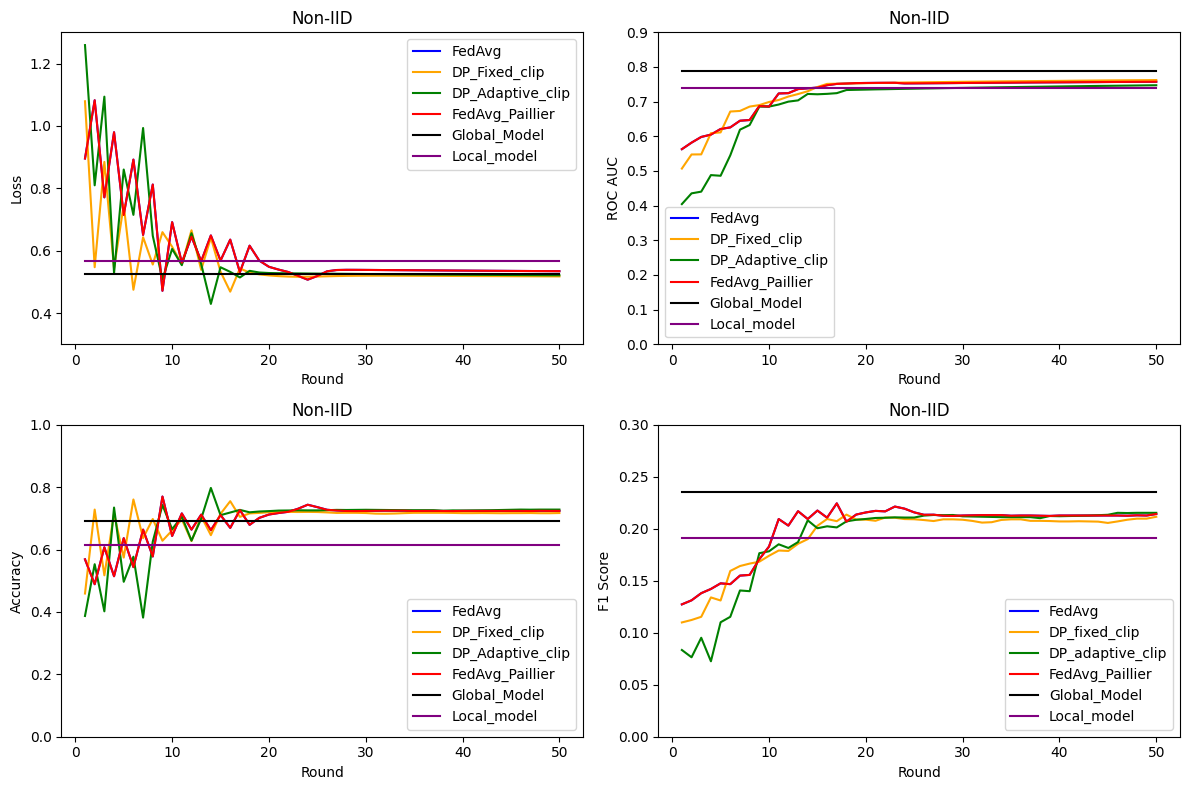

In [47]:
def load_metrics(filename: str) -> dict:

    if not os.path.exists(filename):
        raise FileNotFoundError(f"Файл {filename} не найден.")
    
    with open(filename, 'r') as f:
        try:
            data = json.load(f)
            print(f"Метрики успешно загружены из {filename}.")
            return data
        except json.JSONDecodeError as e:
            raise ValueError(f"Ошибка декодирования JSON: {e}")

def extract_strategy_metrics(data: dict, strategies: list) -> dict:

    extracted = {}
    for strategy in strategies:
        if strategy in data:
            if len(data[strategy]) > 0:
                extracted[strategy] = data[strategy][0]  
                print(f"Метрики для стратегии '{strategy}' успешно извлечены.")
            else:
                print(f"Предупреждение: Нет запусков для стратегии '{strategy}'.")
                extracted[strategy] = {
                    "losses": [],
                    "ROC_AUCs": [],
                    "ACCURACYs": [],
                    "F1s": []
                }
        else:
            print(f"Стратегия '{strategy}' отсутствует в данных.")
            extracted[strategy] = {
                "losses": [],
                "ROC_AUCs": [],
                "ACCURACYs": [],
                "F1s": []
            }
    return extracted

def main():

    metrics_file = "../Non_iid_m.json"

    strategies = ["fed_avg", "dp_fixed", "dp_adaptive","fed_avg_paillier", "global_model", "local_model"]

    metrics_data = load_metrics(metrics_file)

    extracted_metrics = extract_strategy_metrics(metrics_data, strategies)


    fed_avg = extracted_metrics["fed_avg"]
    dp_fixed_clip = extracted_metrics["dp_fixed"]
    dp_adaptive_clip = extracted_metrics["dp_adaptive"]
    fed_avg_paillier = extracted_metrics["fed_avg"]
    global_metrics = extracted_metrics["global_model"]
    local_metrics = extracted_metrics["local_model"]


    num_rounds = len(fed_avg["losses"])

    
    if num_rounds > 0:
        plot_metrics_comparison_simple(
            L_1 = fed_avg["losses"],
            ROC_AUC_1 = fed_avg["ROC_AUCs"],
            ACCURACY_1 = fed_avg["ACCURACYs"],
            F1_1 = fed_avg["F1s"],
            
            L_2 = dp_fixed_clip["losses"],
            ROC_AUC_2 = dp_fixed_clip["ROC_AUCs"],
            ACCURACY_2 = dp_fixed_clip["ACCURACYs"],
            F1_2 = dp_fixed_clip["F1s"],
            
            L_3 = dp_adaptive_clip["losses"],
            ROC_AUC_3 = dp_adaptive_clip["ROC_AUCs"],
            ACCURACY_3 = dp_adaptive_clip["ACCURACYs"],
            F1_3 = dp_adaptive_clip["F1s"],
            
            L_4 = fed_avg_paillier["losses"],
            ROC_AUC_4 = fed_avg_paillier["ROC_AUCs"],
            ACCURACY_4 = fed_avg_paillier["ACCURACYs"],
            F1_4 = fed_avg_paillier["F1s"],

            L_5 = global_metrics["losses"],
            ROC_AUC_5 = global_metrics["ROC_AUCs"],
            ACCURACY_5 = global_metrics["ACCURACYs"],
            F1_5 = global_metrics["F1s"],

            
            L_6 = local_metrics["losses"],
            ROC_AUC_6 = local_metrics["ROC_AUCs"],
            ACCURACY_6 = local_metrics["ACCURACYs"],
            F1_6 = local_metrics["F1s"]
            

        
        )
    else:
        print("Нет данных для построения графиков.")

if __name__ == "__main__":
    main()
